In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
vaccine = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv')
vaccine.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
vaccine.shape

(26707, 34)

In [5]:
vaccine.dtypes.value_counts()

float64    23
object      9
int64       2
dtype: int64

In [6]:
vaccine.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [7]:
vaccine.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [8]:
vaccine['h1n1_worry'].unique()

array([ 1.,  3.,  2.,  0., nan])

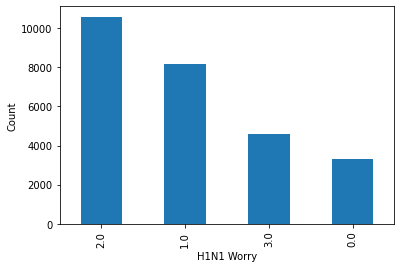

In [9]:
vaccine['h1n1_worry'].value_counts().plot(kind = 'bar')
plt.xlabel('H1N1 Worry')
plt.ylabel('Count')
plt.show()

In [10]:
display(vaccine['h1n1_worry'].mode(), vaccine['h1n1_worry'].median())

0    2.0
dtype: float64

2.0

In [11]:
# Fill 92 missing values by mode
vaccine['h1n1_worry'].fillna(vaccine['h1n1_worry'].mode()[0], inplace = True)

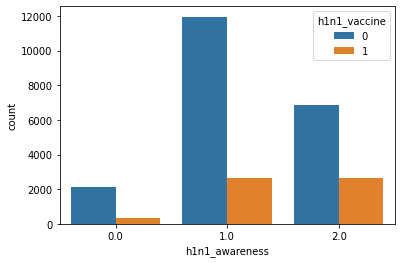

In [12]:
sns.countplot(x = 'h1n1_awareness', data = vaccine, hue = 'h1n1_vaccine')
plt.show()

In [13]:
# Fill 192 missing values by mode
vaccine['h1n1_awareness'].fillna(vaccine['h1n1_awareness'].mode()[0], inplace = True)

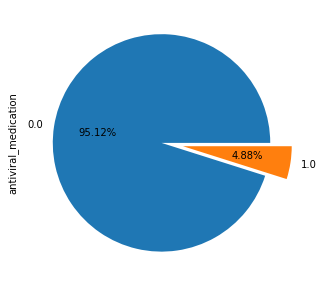

In [14]:
vaccine['antiviral_medication'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5], explode = [0,0.2])
plt.show()

In [15]:
display(vaccine['antiviral_medication'].mode())
# missing 71 missing values by mode
vaccine['antiviral_medication'].fillna(vaccine['antiviral_medication'].mode()[0], inplace = True)

0    0.0
dtype: float64

In [16]:
vaccine['contact_avoidance'].value_counts()

1.0    19228
0.0     7271
Name: contact_avoidance, dtype: int64

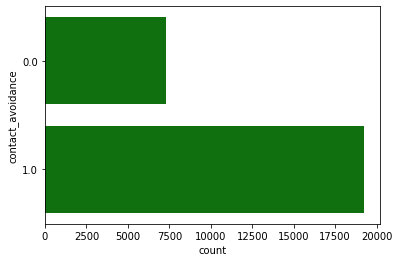

In [17]:
sns.countplot(y = 'contact_avoidance', data = vaccine, color = 'green')
plt.show()

In [18]:
# Fill 208 missing values by mode
vaccine['contact_avoidance'].fillna(vaccine['contact_avoidance'].mode()[0], inplace = True)

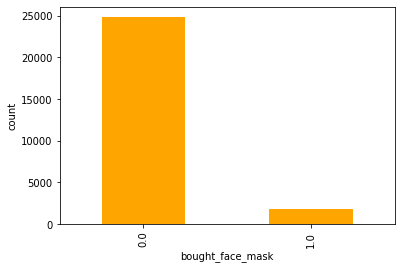

In [19]:
vaccine['bought_face_mask'].value_counts().plot(kind = 'bar', color = 'orange')
plt.xlabel('bought_face_mask')
plt.ylabel('count')
plt.show()

In [20]:
# Fill 19 missing values by mode
vaccine['bought_face_mask'].fillna(vaccine['bought_face_mask'].mode()[0], inplace = True)

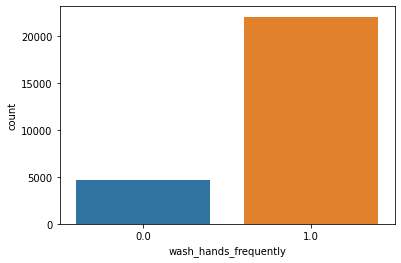

In [21]:
sns.countplot(x = 'wash_hands_frequently', data = vaccine)
plt.show()

In [22]:
# Fill 42 missing values by mode
vaccine['wash_hands_frequently'].fillna(vaccine['wash_hands_frequently'].mode()[0], inplace = True)

In [23]:
vaccine['avoid_large_gatherings'].value_counts()

0.0    17073
1.0     9547
Name: avoid_large_gatherings, dtype: int64

In [24]:
# Fill 87 missing values by mode
vaccine['avoid_large_gatherings'].fillna(vaccine['avoid_large_gatherings'].mode()[0], inplace = True)

In [25]:
vaccine['reduced_outside_home_cont'].value_counts()

0.0    17644
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

In [26]:
# Fill 82 missing values by mode
vaccine['reduced_outside_home_cont'].fillna(vaccine['reduced_outside_home_cont'].mode()[0], inplace = True)

In [27]:
vaccine['avoid_touch_face'].value_counts()

1.0    18001
0.0     8578
Name: avoid_touch_face, dtype: int64

In [28]:
# Fill 128 missing values by mode
vaccine['avoid_touch_face'].fillna(vaccine['avoid_touch_face'].mode()[0], inplace = True)

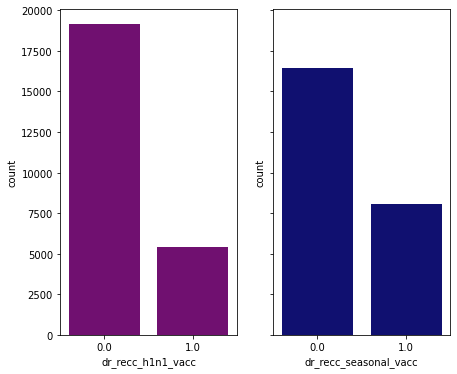

In [30]:
fig, ax = plt.subplots(1,2, figsize = [7,6], sharey = True )
sns.countplot(x = 'dr_recc_h1n1_vacc', data = vaccine, color = 'purple', ax=ax[0])
sns.countplot(x = 'dr_recc_seasonal_vacc', data = vaccine, color = 'navy', ax=ax[1])
plt.show()

In [31]:
# Fill 2160 missing values by mode
vaccine['dr_recc_h1n1_vacc'].fillna(vaccine['dr_recc_h1n1_vacc'].mode()[0], inplace = True)
vaccine['dr_recc_seasonal_vacc'].fillna(vaccine['dr_recc_seasonal_vacc'].mode()[0], inplace = True)

In [32]:
vaccine['chronic_medic_condition'].value_counts()

0.0    18446
1.0     7290
Name: chronic_medic_condition, dtype: int64

In [33]:
# Fill 971 missing values by mode
vaccine['chronic_medic_condition'].fillna(vaccine['chronic_medic_condition'].mode()[0], inplace = True)

<AxesSubplot:>

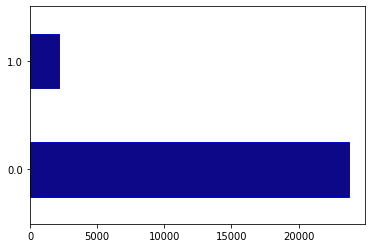

In [37]:
vaccine['cont_child_undr_6_mnths'].value_counts().plot(kind = 'barh', cmap = 'plasma', edgecolor = 'b')

In [38]:
# Fill 820 missing values by mode
vaccine['cont_child_undr_6_mnths'].fillna(vaccine['cont_child_undr_6_mnths'].mode()[0], inplace = True)

In [39]:
vaccine['is_health_worker'].value_counts()

0.0    23004
1.0     2899
Name: is_health_worker, dtype: int64

In [40]:
# Fill 804 missing values by mode
vaccine['is_health_worker'].fillna(vaccine['is_health_worker'].mode()[0], inplace = True)

<AxesSubplot:>

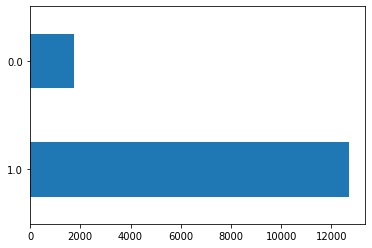

In [41]:
vaccine['has_health_insur'].value_counts().plot(kind = 'barh')

In [42]:
vaccine['has_health_insur'].fillna(2.0, inplace = True)

<AxesSubplot:>

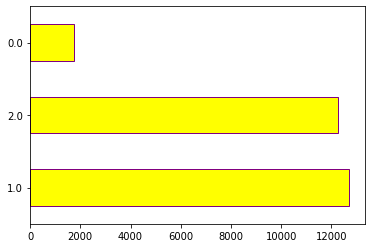

In [44]:
vaccine['has_health_insur'].value_counts().plot(kind = 'barh', color = 'yellow', edgecolor = 'purple')

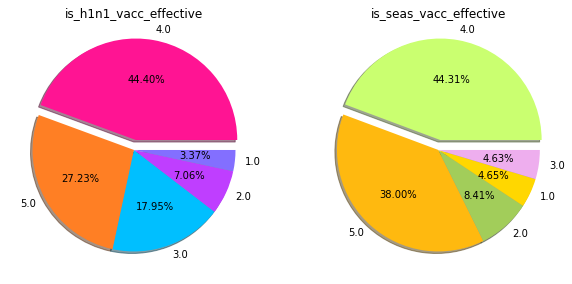

In [46]:
colors = ['#FF1493', '#FF7F24', '#00BFFF', '#BF3EFF', '#836FFF']
colors1 = ['#CAFF70', '#FFB90F', '#A2CD5A', '#FFD700', '#EEAEEE']
fig, (ax1,ax2) = plt.subplots(1,2, figsize = [10,10])

ax1.pie(vaccine['is_h1n1_vacc_effective'].value_counts(), labels = vaccine['is_h1n1_vacc_effective'].value_counts().index , 
        autopct = '%0.2f%%', explode= [0.1,0,0,0,0], colors = colors, shadow = True)

ax2.pie(vaccine['is_seas_vacc_effective'].value_counts(), labels = vaccine['is_seas_vacc_effective'].value_counts().index , 
        autopct = '%0.2f%%', explode= [0.1,0,0,0,0], colors = colors1, shadow = True)

ax1.set_title('is_h1n1_vacc_effective')
ax2.set_title('is_seas_vacc_effective')

plt.show()

In [47]:
#Fill 391 and 462 missing values respectively by mode
vaccine['is_h1n1_vacc_effective'].fillna(vaccine['is_h1n1_vacc_effective'].mode()[0], inplace = True)
vaccine['is_seas_vacc_effective'].fillna(vaccine['is_seas_vacc_effective'].mode()[0], inplace = True)

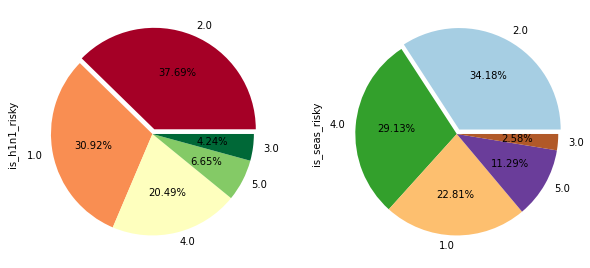

In [48]:
fig, ax = plt.subplots(1, 2, figsize = [10,10])
vaccine['is_h1n1_risky'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'RdYlGn', ax = ax[0])
vaccine['is_seas_risky'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'Paired', ax = ax[1])
plt.show()

In [49]:
# Fill 388 and 514 missing values respectively by mode
vaccine['is_h1n1_risky'].fillna(vaccine['is_h1n1_risky'].mode()[0], inplace = True)
vaccine['is_seas_risky'].fillna(vaccine['is_seas_risky'].mode()[0], inplace = True)

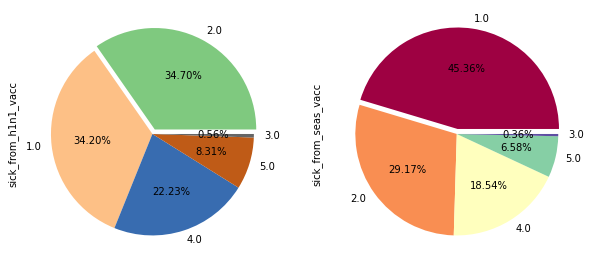

In [52]:
fig, ax = plt.subplots(1,2, figsize = [10,10])
vaccine['sick_from_h1n1_vacc'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'Accent', ax = ax[0])
vaccine['sick_from_seas_vacc'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'Spectral', ax = ax[1])
plt.show()

In [53]:
# Fill 395 and 537 missing values respectively by mode
vaccine['sick_from_h1n1_vacc'].fillna(vaccine['sick_from_h1n1_vacc'].mode()[0], inplace = True)
vaccine['sick_from_seas_vacc'].fillna(vaccine['sick_from_seas_vacc'].mode()[0], inplace = True)

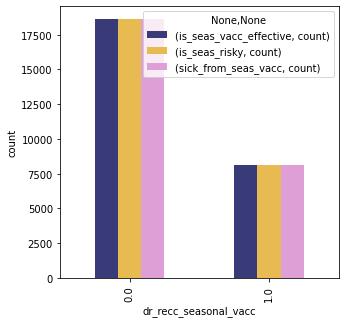

In [55]:
vaccine.groupby(['dr_recc_seasonal_vacc']).agg({'is_seas_vacc_effective' : ['count'], 'is_seas_risky' :['count'], 'sick_from_seas_vacc' : ['count']}).plot(kind = 'bar', cmap = 'tab20b', figsize = [5,5])
plt.ylabel('count')
plt.show()

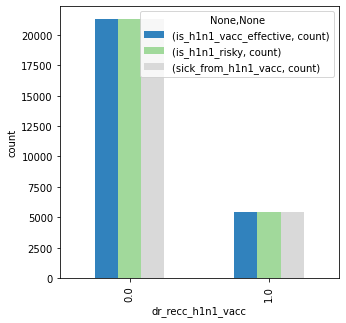

In [56]:
vaccine.groupby(['dr_recc_h1n1_vacc']).agg({'is_h1n1_vacc_effective' : ['count'], 'is_h1n1_risky' :['count'], 'sick_from_h1n1_vacc' : ['count']}).plot(kind = 'bar', cmap = 'tab20c', figsize = [5,5])
plt.ylabel('count')
plt.show()

In [57]:
vaccine['qualification'].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64

In [58]:
# Fill 1407 missing values by mode
vaccine['qualification'].fillna(vaccine['qualification'].mode()[0], inplace = True)

<AxesSubplot:>

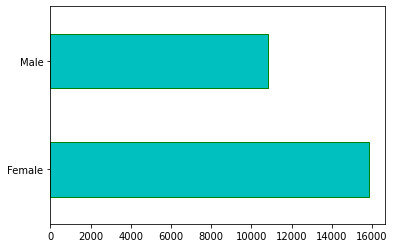

In [59]:
vaccine['sex'].value_counts().plot(kind = 'barh', color = 'c', edgecolor = 'g')

<AxesSubplot:ylabel='income_level'>

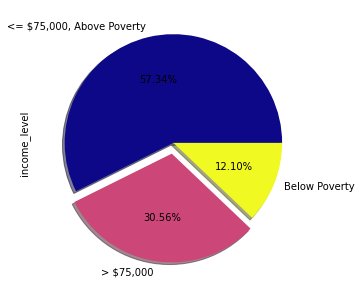

In [62]:
vaccine['income_level'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', cmap = 'plasma', explode = [0,0.1,0], figsize = [5,5], shadow = True)

In [63]:
vaccine['income_level'].fillna('Unknown', inplace = True)

In [64]:

vaccine['marital_status'].value_counts()# filling 1408 missing values by mode
vaccine['marital_status'].fillna(vaccine['marital_status'].mode()[0], inplace = True)

Married        13555
Not Married    11744
Name: marital_status, dtype: int64

In [65]:
# Fill 1408 missing values by mode
vaccine['marital_status'].fillna(vaccine['marital_status'].mode()[0], inplace = True)

<AxesSubplot:>

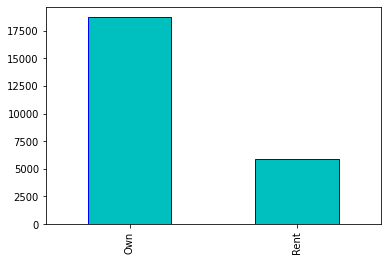

In [66]:
vaccine['housing_status'].value_counts().plot(kind = 'bar', color = 'c', edgecolor = 'b')

In [67]:
# Fill 2402 missing values by mode
vaccine['housing_status'].fillna(vaccine['housing_status'].mode()[0], inplace = True)

<AxesSubplot:ylabel='employment'>

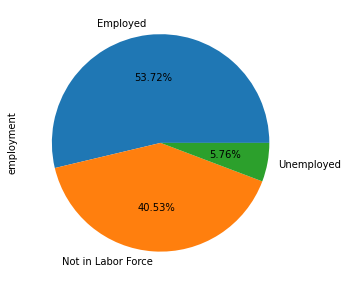

In [68]:
vaccine['employment'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5])

In [69]:
# Fill 1463 missing values by mode
vaccine['employment'].fillna(vaccine['employment'].mode()[0], inplace = True)

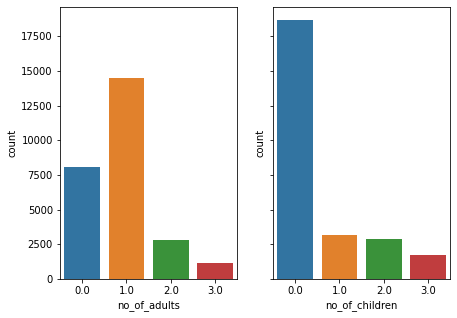

In [70]:
fig, ax = plt.subplots(1,2, figsize = [7,5], sharey = True)
sns.countplot( x = 'no_of_adults', data = vaccine, ax = ax[0])
sns.countplot( x = 'no_of_children', data = vaccine, ax = ax[1])
plt.show()

In [71]:
# Fill 249 nan values by mode
vaccine['no_of_adults'].fillna(vaccine['no_of_adults'].mode()[0], inplace = True)
vaccine['no_of_children'].fillna(vaccine['no_of_children'].mode()[0], inplace = True)

In [72]:
vaccine['age_bracket'].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64

In [73]:
vaccine.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [100]:
vaccine1 = vaccine.astype({'h1n1_worry' : str, 'h1n1_awareness': str, 'antiviral_medication': str,
       'contact_avoidance': str, 'bought_face_mask': str, 'wash_hands_frequently': str,
       'avoid_large_gatherings': str, 'reduced_outside_home_cont': str,
       'avoid_touch_face': str, 'dr_recc_h1n1_vacc': str, 'dr_recc_seasonal_vacc': str,
       'chronic_medic_condition': str, 'cont_child_undr_6_mnths': str,
       'is_health_worker': str, 'has_health_insur': str, 'is_h1n1_vacc_effective': str,
       'is_h1n1_risky': str, 'sick_from_h1n1_vacc': str, 'is_seas_vacc_effective': str, 'age_bracket' : str,
       'is_seas_risky': str, 'sick_from_seas_vacc': str, 'no_of_adults' : str, 'no_of_children' : str,
        'h1n1_vaccine' : str})
vaccine1.dtypes.value_counts()

object    33
dtype: int64

In [81]:
vaccine1=vaccine1.drop(['unique_id'], inplace = True, axis = 1)

In [101]:
vaccine1.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [102]:
vaccine_dummy = pd.get_dummies(vaccine1, drop_first= True )

In [103]:
vaccine_dummy.shape

(26707, 70)

In [104]:
vaccine_dummy['h1n1_vaccine_1'].value_counts(normalize = True)

0    0.787546
1    0.212454
Name: h1n1_vaccine_1, dtype: float64

In [106]:
ydata=vaccine_dummy['h1n1_vaccine_1']
xdata=vaccine_dummy.drop(['h1n1_vaccine_1'], axis=1)

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Var'] = xdata.columns
vif_data['VIF'] = [variance_inflation_factor(xdata.values, i) for i in range(len(xdata.columns))]

In [108]:
vif_data.sort_values(by = ['VIF'], ascending = False)

,Var,VIF
28,sick_from_h1n1_vacc_3.0,1.094738
40,sick_from_seas_vacc_3.0,1.087666
22,is_h1n1_vacc_effective_5.0,0.379078
32,is_seas_vacc_effective_3.0,0.376005
36,is_seas_risky_3.0,0.351710
...,...,...
4,h1n1_awareness_2.0,0.008856
25,is_h1n1_risky_4.0,0.008779
62,census_msa_Non-MSA,0.006878
10,reduced_outside_home_cont_1.0,0.005734


In [109]:
x_train, x_test, y_train , y_test=train_test_split(x,y, test_size=.25, random_state=88)

In [110]:
log = LogisticRegression()
log.fit(x_train,y_train)
print(f"Training Score : {log.score(x_train, y_train)}")
print(f"Testing Score : {log.score(x_test, y_test)}")

Training Score : 0.8558162755866201
Testing Score : 0.8442414257900255


In [111]:
pred_train=log.predict(x_train)
pred_test=log.predict(x_test)

In [113]:
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_train , pred_train), columns=["Pred_0", "Pred_1"], index=["Act_0", "Act_1"])
cnfTrain

,Pred_0,Pred_1
Act_0,15031,773
Act_1,2115,2111


In [114]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     15804
           1       0.73      0.50      0.59      4226

    accuracy                           0.86     20030
   macro avg       0.80      0.73      0.75     20030
weighted avg       0.85      0.86      0.85     20030



In [116]:
cnfTest=pd.DataFrame(metrics.confusion_matrix(y_test , pred_test), columns=["Pred_0", "Pred_1"], index=["Act_0", "Act_1"])
cnfTest

,Pred_0,Pred_1
Act_0,4985,244
Act_1,796,652


In [117]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      5229
           1       0.73      0.45      0.56      1448

    accuracy                           0.84      6677
   macro avg       0.79      0.70      0.73      6677
weighted avg       0.83      0.84      0.83      6677



In [118]:
pd.DataFrame(log.predict_proba(x_train), columns=["Prob_0", "Prob_1"])

,Prob_0,Prob_1
0,0.945305,0.054695
1,0.965775,0.034225
2,0.404756,0.595244
3,0.988857,0.011143
4,0.799952,0.200048
...,...,...
20025,0.963749,0.036251
20026,0.935796,0.064204
20027,0.735832,0.264168
20028,0.775515,0.224485


In [119]:
x_train1=x_train.copy()
x_train1["Actual_Default"]=y_train
x_train1["Prob_Default"]=log.predict_proba(x_train)[:, 1]
x_train1

,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,...,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0,Actual_Default,Prob_Default
9353,1,0,0,1,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0.054695
6317,0,1,0,1,0,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,0.034225
13542,0,1,0,1,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0.595244
23986,0,1,0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0.011143
16025,1,0,0,0,1,1,1,0,1,1,...,1,0,1,0,0,0,0,0,1,0.200048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24938,0,0,0,0,1,0,1,0,1,0,...,0,1,0,0,1,1,0,0,0,0.036251
2481,0,0,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0.064204
4047,0,0,1,1,0,0,1,0,1,1,...,0,1,1,0,0,0,1,0,0,0.264168
6432,1,0,0,1,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0.224485


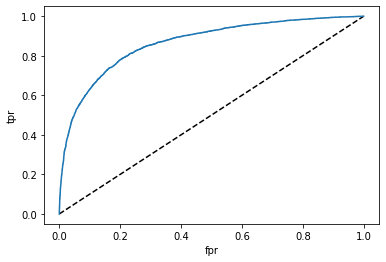

In [121]:
probs=log.predict_proba(x_train)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='logistic')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [124]:
metrics.roc_auc_score(y_train,probs)

0.8646604470787018